# Logistic Regression


I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.
Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.
Description of Variables
The dataset contains 6366 observations of 9 variables:
rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)
age: woman's age
yrs_married: number of years married
children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)
educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-
skilled/unskilled, 3 = "white collar", 4 =

teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)
occupation_husb: husband's occupation (same coding as above)
affairs: time spent in extra-marital affairs
Code to loading data and modules:

Importing necessary libraries

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns

Data Preprocessing

In [9]:
dta=sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
#all the rows with having affairs
dta['affair'] = (dta.affairs>0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [11]:
dta['occupation'].unique()

array([2., 3., 5., 4., 1., 6.])

In [12]:
#all the rows with having affairs
dta.loc[dta['affairs']<=0].head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0


In [13]:
dta['affair'].unique()

array([1, 0])

In [14]:
y, x = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")
x = x.rename(columns =
{ 'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [15]:
x.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [16]:
y=pd.DataFrame({'affairs':list(y)})

In [17]:
y.head()

,affairs
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [18]:
df=pd.concat([x,y],axis=1)
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [19]:
df.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affairs          0
dtype: int64

In [20]:
df[df['affairs']==0].shape

(4313, 18)

In [21]:
df[df['affairs']==1].shape

(2053, 18)

In [22]:
df.describe()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,0.322495
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.467468
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,0.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,1.000000


In [23]:
df.groupby('affairs').mean()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
affairs,,,,,,,,,,,,,,,,,
0.0,1.0,0.140737,0.421516,0.313935,0.099930,0.015998,0.204498,0.073499,0.322513,0.272896,0.084628,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977
1.0,1.0,0.122747,0.470044,0.233804,0.150511,0.019484,0.207501,0.084267,0.311252,0.293229,0.080370,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236


In [24]:
df.groupby('rate_marriage').mean()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,age,yrs_married,children,religious,educ,affairs
rate_marriage,,,,,,,,,,,,,,,,,
1.0,1.0,0.242424,0.393939,0.262626,0.090909,0.010101,0.212121,0.070707,0.313131,0.323232,0.050505,33.823232,13.914141,2.308081,2.343434,13.848485,0.747475
2.0,1.0,0.143678,0.520115,0.206897,0.109195,0.017241,0.252874,0.094828,0.298851,0.298851,0.045977,30.471264,10.727011,1.735632,2.330460,13.864943,0.635057
3.0,1.0,0.135952,0.473313,0.241692,0.124874,0.019134,0.236657,0.082578,0.318228,0.254783,0.084592,30.008056,10.239174,1.638469,2.308157,14.001007,0.550856
4.0,1.0,0.129349,0.446030,0.286351,0.118198,0.013381,0.197591,0.081178,0.325602,0.280553,0.075379,28.856601,8.816905,1.369536,2.400981,14.144514,0.322926
5.0,1.0,0.134128,0.407228,0.318182,0.113264,0.019747,0.194113,0.069300,0.316319,0.283532,0.095380,28.574702,8.311662,1.252794,2.506334,14.399776,0.181446


In [25]:
df['religious'].unique()

array([3., 1., 2., 4.])

Data Visualization

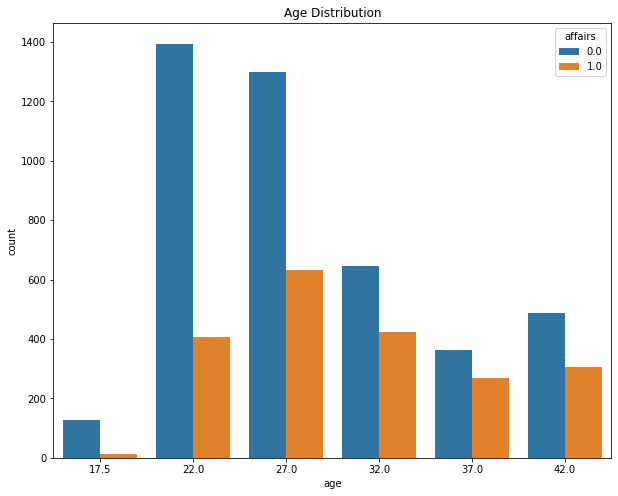

In [26]:
plt.figure(figsize=(10,8))
plt.title("Age Distribution")
sns.countplot("age",data=df,hue="affairs")
plt.show()

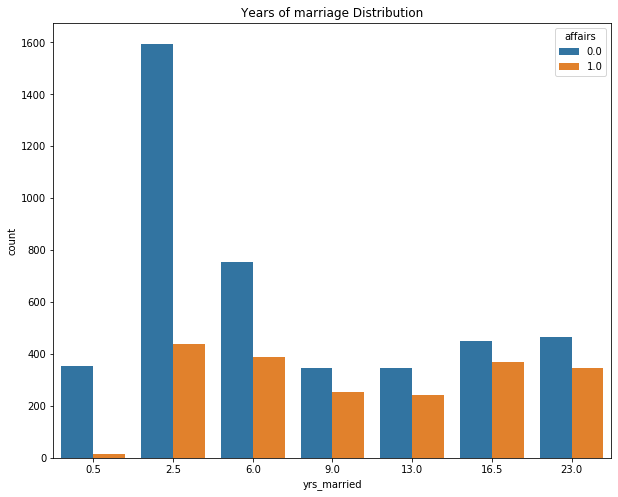

In [27]:
plt.figure(figsize=(10,8))
plt.title("Years of marriage Distribution")
sns.countplot("yrs_married",data=df,hue="affairs")
plt.show()

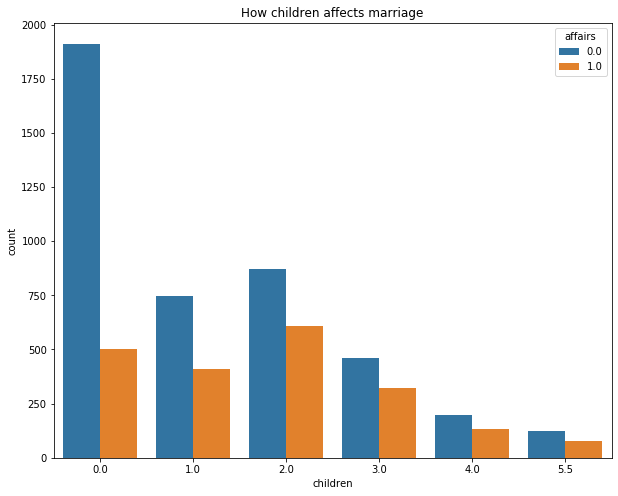

In [28]:
plt.figure(figsize=(10,8))
sns.countplot("children",data=df,hue="affairs")
plt.title("How children affects marriage")
plt.show()

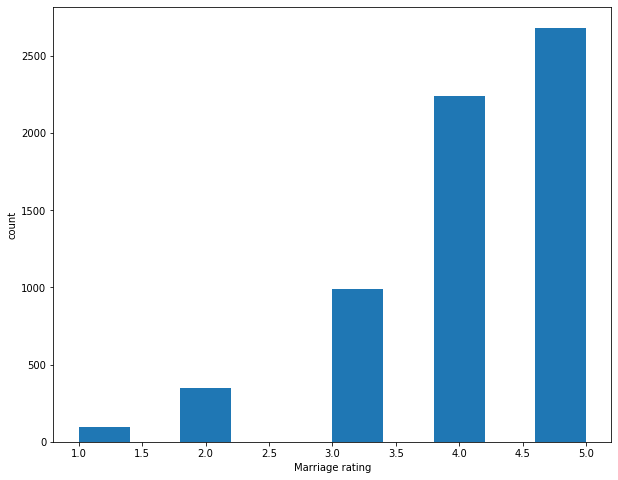

In [29]:
plt.figure(figsize=(10,8))
plt.hist(df["rate_marriage"])
plt.xlabel("Marriage rating")
plt.ylabel("count")
plt.show()

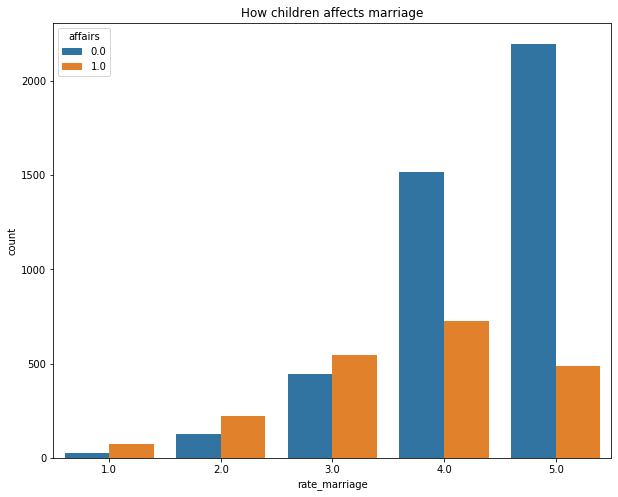

In [30]:
plt.figure(figsize=(10,8))
sns.countplot("rate_marriage",data=df,hue="affairs")
plt.title("How children affects marriage")
plt.show()

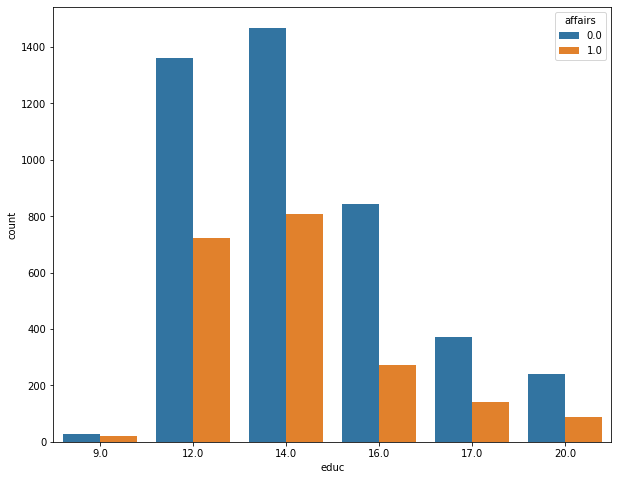

In [31]:
plt.figure(figsize=(10,8))
sns.countplot("educ",data=df,hue="affairs")
plt.show()

Modeling

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4456, 17)
(4456, 1)
(1910, 17)
(1910, 1)


In [33]:
lg=LogisticRegression()

In [34]:
lg.fit(x_train,y_train)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
y_pred=lg.predict(x_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

Evaluation

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report,roc_auc_score

In [37]:
accuracy = accuracy_score(y_train,lg.predict(x_train))
accuracy
print("Our training set has",accuracy,"accuracy")

Our training set has 0.7271095152603232 accuracy


In [38]:
accuracy = accuracy_score(y_test,y_pred)
accuracy
print("Our testing set has",accuracy,"accuaracy")
print("Accuaracy of our model is similar to the training accuaracy")

Our testing set has 0.7141361256544503 accuaracy
Accuaracy of our model is similar to the training accuaracy


In [39]:
probs = lg.predict_proba(x_test)
probs

array([[0.92053947, 0.07946053],
       [0.8012024 , 0.1987976 ],
       [0.68340047, 0.31659953],
       ...,
       [0.32714616, 0.67285384],
       [0.68759634, 0.31240366],
       [0.63188949, 0.36811051]])

In [40]:
print("roc_auc_score",roc_auc_score(y_test,probs[:,1]))

roc_auc_score 0.7385334419986441


In [41]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1167,  119],
       [ 427,  197]], dtype=int64)

In [42]:
import scikitplot

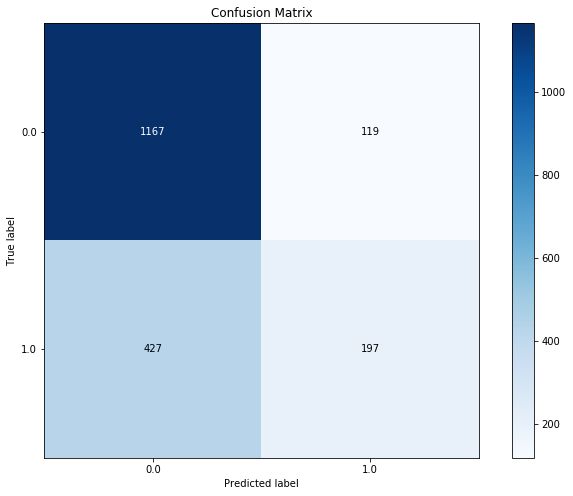

In [43]:
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(12,8))

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      1286
         1.0       0.62      0.32      0.42       624

    accuracy                           0.71      1910
   macro avg       0.68      0.61      0.61      1910
weighted avg       0.70      0.71      0.68      1910



C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


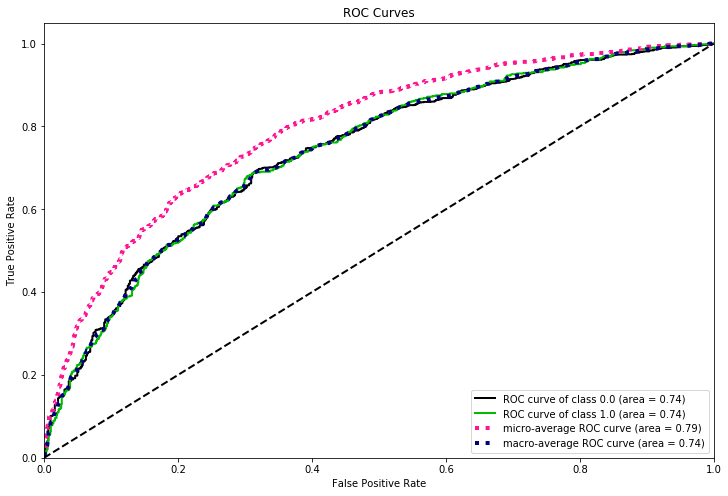

In [45]:
pred_proba=lg.predict_proba(x_test)
scikitplot.metrics.plot_roc_curve(y_test,pred_proba,figsize=(12,8))

In [46]:
lg.predict_proba(np.array([[1,0,0,1,0,0,1,0,1,0,1,4,29,5,3,4,18]]))

array([[0.74897559, 0.25102441]])

In [51]:
p=lg.predict_proba(np.array([[1,1,1,1,1,0,1,1,0,1,1,2,22,3,2,1,17]]))

In [54]:
int(p[0][1]*100)

95

In [47]:
print("Predicted probability of the affair is 25%")

Predicted probability of the affair is 25%


In [48]:
lg.predict(np.array([[1,0,0,1,0,0,1,0,1,0,1,4,1,5,3,4,18]]))

array([1.])

In [49]:
print("Our prediction result says that the women has no affair")

Our prediction result says that the women has no affair


In [43]:
import pickle
filename='finalized_model_logis.pickle'
pickle.dump(lg,open(filename,'wb'))

In [45]:
loaded_model=pickle.load(open(filename,'rb'))
a=int(loaded_model.predict([[1,0,0,1,0,0,1,0,1,0,1,4,29,5,3,4,18]]))
a

0

In [7]:
("woman does not have any affair with "+str(int(25.9876)))

'woman does not have any affair with 25'